# Rocking with visualized music!

# Project Overview


![alt text](https://media.giphy.com/media/13oOmve7w8HETC/giphy.gif)

Spotify is the largest music streaming platform.With more than 35 million songs and 170 million monthly active users. In this project, we will extract several types of data from Spotify and analyze the data to find insights that will give us a better understanding of our listening habits and music industry.  

Specifically, we will be extracting data from Spotify Web API, making a useful analytical set out of it, performing statistical analysis and creating visulizations. 

Our research questions are as below:

1) What are the audio features of popular songs? 

2) Does popular songs share any similar characteristics?

3) How diverse are the popular songs of different eras? 

Expected Findings:

1) Popular songs were less diversed.

2) Popular songs have a common high value for certain specific parameter(example: energy, danceability).

In the next part of the project, we develop a recommendation system which will take a single track and return top 5 similar tracks from the database. These recommendations are based on the audio features of tracks which will be discussed in detail below! 

## Let's get started!
![alt text](https://media.giphy.com/media/nWg4h2IK6jYRO/giphy.gif "Logo Title Text 1")

# 1. Data Extraction, Cleaning and Wrangling

## Data acquisition

On the basis of the analysis we intend to perform and research questions we intend to answer, we realised we would require data  consisting of **Top performing songs of 2019 along with their properties of each track.**

Now because we were unable to find such dataset and since we believe data extraction and cleaning, however boring, is an important aspect of any datascience project, we decided to extract reuired data through Spotify API, explore different endpoints available, extract it, wrangle it from raw format into a dataframe format and clean it.

In order to get access to Spotify data, we had to create a developer account, generated client id and secret code, explored various endpoints at [Spotify Web API Console](https://developer.spotify.com/console/)
APIs work on response/request basis. API communication is usually done through JSON format. 
However, here we found a library called [Spotipy](https://spotipy.readthedocs.io/) that helps us easily access spotify web API.

### 1.1 Data Extraction - 1 (Top Tracks of 2019)
![alt text](https://media.giphy.com/media/4FQMuOKR6zQRO/giphy.gif "Logo Title Text 1")

In [2]:
#Setting up Spotify API end point
import spotipy

from spotipy.oauth2 import SpotifyClientCredentials 

cid ="841e0a8ce6a84bab829e9b438660e75f" 
secret = "f3019d467db34e3786e9204bc9d0eeb3" 
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

Here is the list of various enpoints through which we can extract data from Spotify Web API:
![alt text](https://github.com/tgel0/tgel0.github.io/blob/master/images/Spotifyendpoints.PNG?raw=true)

We would be using "search" method provided by Spotipy Library to extract the tracks of 2019. A sample query and output is as shown below.

In [3]:
output = sp.search(q='year:2019', type='track')
print(output)

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=year%3A2019&type=track&offset=0&limit=10', 'items': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/246dkjvS1zLTtiykXe5h60'}, 'href': 'https://api.spotify.com/v1/artists/246dkjvS1zLTtiykXe5h60', 'id': '246dkjvS1zLTtiykXe5h60', 'name': 'Post Malone', 'type': 'artist', 'uri': 'spotify:artist:246dkjvS1zLTtiykXe5h60'}], 'available_markets': ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JO', 'JP', 'KW', 'LB', 'LI', 'LT', 'LU', 'LV', 'MA', 'MC', 'MT', 'MX', 'MY', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PS', 'PT', 'PY', 'QA', 'RO', 'SA', 'SE', 'SG', 'SK', 'SV', 'TH', 'TN', 'TR', 'TW', 'US', 'UY', 'VN', 'ZA'], 'external_urls': {'spotify': 'https://open.spotify.com/album/4

Creating empty list and getting the artist name, track name, popularity parameter and the track id of 10000 tracks from the results shown above.

In [4]:
artist_name = []
track_name = []
popularity = []
track_id = []

#Offset is set to 50 as spotify returns maximum of 50 results per query
for i in range(0,10000,50):
    track_results = sp.search(q='year:2019', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])

In [5]:
print("Number of tracks exracted: " + str(len(track_id)))

Number of tracks exracted: 10000


### 1.2 Formatting and Cleaning Code

![alt text](https://tenor.com/view/sponge-bob-cleaning-cats-household-chores-gif-4998775.gif "Logo Title Text 1")


Appending lists and converting them into a single dataframe.

In [6]:
import pandas as pd

tracks_df = pd.DataFrame({'artist_name':artist_name,'track_name':track_name,'track_id':track_id,'popularity':popularity})
print(tracks_df.shape)
tracks_df.head()

(10000, 4)


,artist_name,track_name,track_id,popularity
0,Post Malone,Circles,21jGcNKet2qwijlDFuPiPb,99
1,Travis Scott,HIGHEST IN THE ROOM,3eekarcy7kvN4yt5ZFzltW,97
2,Juice WRLD,Bandit (with YoungBoy Never Broke Again),6Gg1gjgKi2AK4e0qzsR7sd,94
3,Arizona Zervas,ROXANNE,696DnlkuDOXcMAnKlTgXXK,97
4,Billie Eilish,everything i wanted,3ZCTVFBt2Brf31RLEnCkWJ,98


### 1.3 Dealing with duplicate values

Many a times, a single track has more than one entry in the dataset. This is due to the track having different track_id as they might have appeared as a single as well as in the album. It might also be due to the track appearing under the profile of two artists who might have collaborated on the track.

We check for these duplicate values by grouping them by artist names and track names and then checking 

In [7]:
grouped = tracks_df.groupby(['artist_name','track_name'], as_index=True).size()
print("Tracks grouped by artist name and track name:")
print("======================")
print(grouped.head(10))
print("======================")
print("All the tracks with duplicate values:")
print("======================")
print(grouped[grouped > 1].head(10))

Tracks grouped by artist name and track name:
artist_name  track_name                                                  
$NOT         Beretta (feat. Wifisfuneral)                                    1
             Billy Boy                                                       1
             Megan                                                           1
             Vision (feat. Lil Tracy)                                        1
$uicideBoy$  Aliens Are Ghosts ($UICIDEBOY$ X TRAVIS BARKER)                 2
             DON'T TRUST ANYONE! ($UICIDEBOY$ X TRAVIS BARKER)               1
             Individuality Was So Last Year ($UICIDEBOY$ X TRAVIS BARKER)    1
             Killing 2 Birds With 22 Stones ($UICIDEBOY$ X TRAVIS BARKER)    1
             Sour Grapes ($UICIDEBOY$ X TRAVIS BARKER)                       1
(G)I-DLE     LION                                                            1
dtype: int64
All the tracks with duplicate values:
artist_name          track_name        

In [8]:
print("Number of duplicate values: " + str(grouped[grouped > 1].count()))

Number of duplicate values: 480


Hence there are 485 duplicate values. In the below code we delete these duplicate values.

In [9]:
tracks_df.drop_duplicates(subset=['artist_name','track_name'], inplace=True)
print("Number of tracks left in the dataframe: " + str(len(tracks_df)))

Number of tracks left in the dataframe: 9435


### 1.4 Data Extraction - 2 (Audio features of the extracted tracks)

![alt text](https://media.giphy.com/media/mi9n538gBX584/giphy.gif)

In [10]:
features_list = []

for i in range(0,len(tracks_df['track_id']),100):
    temp = tracks_df['track_id'][i:i+100]
    features_temp = sp.audio_features(temp)
    for i, t in enumerate(features_temp):
        if t != None:
            features_list.append(t)            

In [11]:
# Making a dataframe for all the audio features
df_audio_features = pd.DataFrame(features_list)
df_audio_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.5530,120.042,audio_features,21jGcNKet2qwijlDFuPiPb,spotify:track:21jGcNKet2qwijlDFuPiPb,https://api.spotify.com/v1/tracks/21jGcNKet2qw...,https://api.spotify.com/v1/audio-analysis/21jG...,215280,4
1,0.598,0.427,7,-8.764,0,0.0317,0.0546,0.000006,0.2100,0.0605,76.469,audio_features,3eekarcy7kvN4yt5ZFzltW,spotify:track:3eekarcy7kvN4yt5ZFzltW,https://api.spotify.com/v1/tracks/3eekarcy7kvN...,https://api.spotify.com/v1/audio-analysis/3eek...,175721,4
2,0.474,0.631,5,-5.884,0,0.3430,0.0687,0.000000,0.1320,0.4250,180.051,audio_features,6Gg1gjgKi2AK4e0qzsR7sd,spotify:track:6Gg1gjgKi2AK4e0qzsR7sd,https://api.spotify.com/v1/tracks/6Gg1gjgKi2AK...,https://api.spotify.com/v1/audio-analysis/6Gg1...,189323,4
3,0.621,0.601,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.4570,116.735,audio_features,696DnlkuDOXcMAnKlTgXXK,spotify:track:696DnlkuDOXcMAnKlTgXXK,https://api.spotify.com/v1/tracks/696DnlkuDOXc...,https://api.spotify.com/v1/audio-analysis/696D...,163636,5
4,0.704,0.225,6,-14.454,0,0.0994,0.9020,0.657000,0.1060,0.2430,120.006,audio_features,3ZCTVFBt2Brf31RLEnCkWJ,spotify:track:3ZCTVFBt2Brf31RLEnCkWJ,https://api.spotify.com/v1/tracks/3ZCTVFBt2Brf...,https://api.spotify.com/v1/audio-analysis/3ZCT...,245426,4


In [12]:
#Checking other columns that has been extracted along with audio features
df_audio_features.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

### 1.5 Merging the audio features with the tracks dataframe usind track_id

In [13]:
#First step: Renaming id to track_id in the audio features table
df_audio_features.rename(columns={'id': 'track_id'}, inplace=True)

In [14]:
complete_df = pd.merge(tracks_df,df_audio_features,on='track_id',how='inner')
complete_df.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,Post Malone,Circles,21jGcNKet2qwijlDFuPiPb,99,0.695,0.762,0,-3.497,1,0.0395,...,0.002440,0.0863,0.5530,120.042,audio_features,spotify:track:21jGcNKet2qwijlDFuPiPb,https://api.spotify.com/v1/tracks/21jGcNKet2qw...,https://api.spotify.com/v1/audio-analysis/21jG...,215280,4
1,Travis Scott,HIGHEST IN THE ROOM,3eekarcy7kvN4yt5ZFzltW,97,0.598,0.427,7,-8.764,0,0.0317,...,0.000006,0.2100,0.0605,76.469,audio_features,spotify:track:3eekarcy7kvN4yt5ZFzltW,https://api.spotify.com/v1/tracks/3eekarcy7kvN...,https://api.spotify.com/v1/audio-analysis/3eek...,175721,4
2,Juice WRLD,Bandit (with YoungBoy Never Broke Again),6Gg1gjgKi2AK4e0qzsR7sd,94,0.474,0.631,5,-5.884,0,0.3430,...,0.000000,0.1320,0.4250,180.051,audio_features,spotify:track:6Gg1gjgKi2AK4e0qzsR7sd,https://api.spotify.com/v1/tracks/6Gg1gjgKi2AK...,https://api.spotify.com/v1/audio-analysis/6Gg1...,189323,4
3,Arizona Zervas,ROXANNE,696DnlkuDOXcMAnKlTgXXK,97,0.621,0.601,6,-5.616,0,0.1480,...,0.000000,0.4600,0.4570,116.735,audio_features,spotify:track:696DnlkuDOXcMAnKlTgXXK,https://api.spotify.com/v1/tracks/696DnlkuDOXc...,https://api.spotify.com/v1/audio-analysis/696D...,163636,5
4,Billie Eilish,everything i wanted,3ZCTVFBt2Brf31RLEnCkWJ,98,0.704,0.225,6,-14.454,0,0.0994,...,0.657000,0.1060,0.2430,120.006,audio_features,spotify:track:3ZCTVFBt2Brf31RLEnCkWJ,https://api.spotify.com/v1/tracks/3ZCTVFBt2Brf...,https://api.spotify.com/v1/audio-analysis/3ZCT...,245426,4


In [15]:
complete_df.shape

(9259, 21)

### 1.6 Extracting the most popular 150 tracks

In [16]:
popular_df = complete_df.sort_values('popularity', ascending = False).head(100)
popular_df.head(5)

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
8,Maroon 5,Memories,2b8fOow8UzyDFAE27YhOZM,100,0.764,0.320,11,-7.209,1,0.0546,...,0.000000,0.0822,0.5750,91.019,audio_features,spotify:track:2b8fOow8UzyDFAE27YhOZM,https://api.spotify.com/v1/tracks/2b8fOow8UzyD...,https://api.spotify.com/v1/audio-analysis/2b8f...,189486,4
0,Post Malone,Circles,21jGcNKet2qwijlDFuPiPb,99,0.695,0.762,0,-3.497,1,0.0395,...,0.002440,0.0863,0.5530,120.042,audio_features,spotify:track:21jGcNKet2qwijlDFuPiPb,https://api.spotify.com/v1/tracks/21jGcNKet2qw...,https://api.spotify.com/v1/audio-analysis/21jG...,215280,4
16,Tones and I,Dance Monkey,2XU0oxnq2qxCpomAAuJY8K,99,0.824,0.588,6,-6.400,0,0.0924,...,0.000104,0.1490,0.5130,98.027,audio_features,spotify:track:2XU0oxnq2qxCpomAAuJY8K,https://api.spotify.com/v1/tracks/2XU0oxnq2qxC...,https://api.spotify.com/v1/audio-analysis/2XU0...,209438,4
4,Billie Eilish,everything i wanted,3ZCTVFBt2Brf31RLEnCkWJ,98,0.704,0.225,6,-14.454,0,0.0994,...,0.657000,0.1060,0.2430,120.006,audio_features,spotify:track:3ZCTVFBt2Brf31RLEnCkWJ,https://api.spotify.com/v1/tracks/3ZCTVFBt2Brf...,https://api.spotify.com/v1/audio-analysis/3ZCT...,245426,4
5,Selena Gomez,Lose You To Love Me,1HfMVBKM75vxSfsQ5VefZ5,98,0.505,0.340,4,-9.005,1,0.0438,...,0.000000,0.2100,0.0916,101.993,audio_features,spotify:track:1HfMVBKM75vxSfsQ5VefZ5,https://api.spotify.com/v1/tracks/1HfMVBKM75vx...,https://api.spotify.com/v1/audio-analysis/1HfM...,206459,4


In [17]:
# Dropping columns that are not required for further analysis
popular_df.drop(['mode','type'], axis=1,inplace=True)

#### Here are some of the most freuqently appearing artist in the list of most popular tracks.

In [18]:
popular_df['artist_name'].value_counts().head()

Post Malone      8
Billie Eilish    4
Taylor Swift     3
Ariana Grande    3
Ed Sheeran       3
Name: artist_name, dtype: int64

# 2. Analysis & Visualization
![alt text](https://media.giphy.com/media/mG1MxDDEMSAVkF7da3/giphy.gif)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

From the Spotiyf API data, this is the description of song's audio features. 
*  **duration**: The duration of the track
* **key**: The estimated overall key of the track(e.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on)
* **mode**: Mode indicates the modality (major or minor) of a track (Major is represented by 1 and minor is 0)
* **time_signature**: An estimated overall time signature of a track( how many beats are in each bar)
* **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.(Songs with high 'acousticness' will consist mostly of natural acoustic sounds (think acoustic guitar, piano, orchestra, the unprocessed human voice), while songs with a low 'acousticness' will consists of mostly electric sounds (think electric guitars, synthesizers, drum machines, auto-tuned vocals and so on)
* **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. (0.0 is least danceable and 1.0 is most danceable.)
* **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
* **instrumentalness**: Predicts whether a track contains no vocals.
* **liveness**: Detects the presence of an audience in the recording. 
* **loudness**: The overall loudness of a track in decibels (dB).
* **speechiness** :Speechiness detects the presence of spoken words in a track
* **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.(Tracks with high valence sound more positive. For example, happy, cheerful and euphoric.)
* **tempo**: The overall estimated tempo of a track in beats per minute (BPM)

(Source: Spotify for Develper API. https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)

### 2.1  Finding the most common length for popular tracks

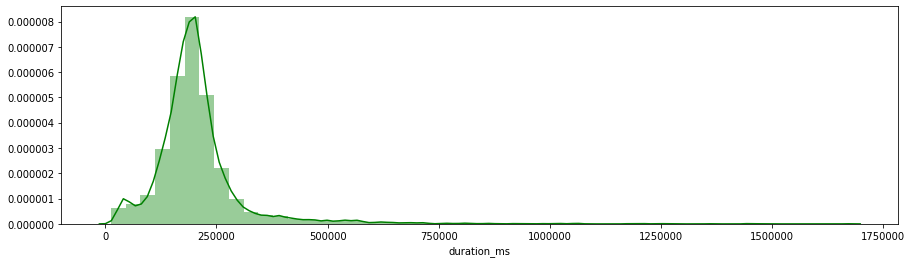

In [20]:
f, axes = plt.subplots(1, 1, sharey=True, figsize=(15, 4))

sns.distplot(complete_df['duration_ms'], ax=axes, color='green')

> ### From the above visualization, we can strongly assert that most songs are arounf 200 seconds i.e. close to 3:20 - 3.30 minute mark. 
> ### This gives us ingredient number one of making a hit song: _Keep duration of song around 3:20 minutes._

### 2.2 Finding trends in audio features among popular songs

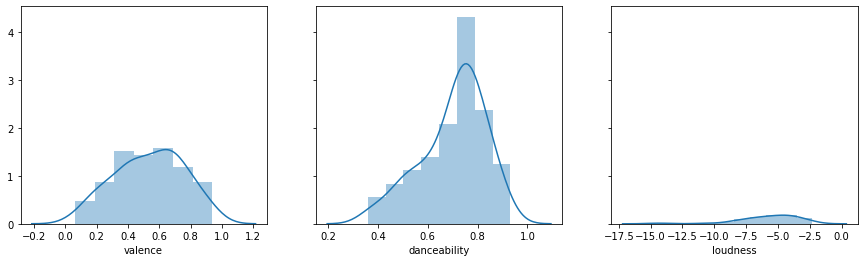

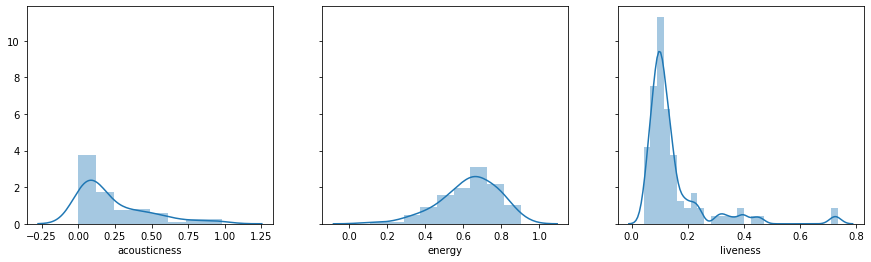

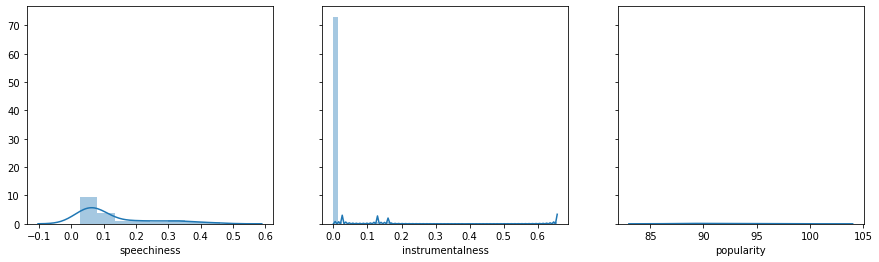

In [21]:
f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 4))

#sns.distplot(popular_df['energy'], ax=axes[0])
#sns.distplot(popular_df['norm_tempo'], ax=axes[2]) 

sns.distplot(popular_df['valence'], ax=axes[0])
sns.distplot(popular_df['danceability'], ax=axes[1])
sns.distplot(popular_df['loudness'], ax=axes[2])

f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 4))
sns.distplot(popular_df['acousticness'], ax=axes[0])
sns.distplot(popular_df['energy'], ax=axes[1])
sns.distplot(popular_df['liveness'], ax=axes[2])

f, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 4))
sns.distplot(popular_df['speechiness'], ax=axes[0])
sns.distplot(popular_df['instrumentalness'], ax=axes[1])
sns.distplot(popular_df['popularity'], ax=axes[2]) 
plt.show()

> #### Key notes from the above visualization:
> #### 1) Most of the popular songs are high on enerygy, danceability and valence.
> #### 2) Most of the popular songs are low on liveness, instrumentalness, speechiness and acousticness.

### 2.3 Visualizing the average audio features of popular songs on a radar chart

In [22]:
dance_avg = popular_df['danceability'].mean()
speech_avg =popular_df['speechiness'].mean()
acoustic_avg =popular_df['acousticness'].mean()
energy_avg =popular_df['energy'].mean()
liveness_avg =popular_df['liveness'].mean()
valence_avg =popular_df['valence'].mean()

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import *

data6 = [go.Scatterpolar(
  r = [valence_avg, dance_avg, acoustic_avg, energy_avg, speech_avg, liveness_avg],
  theta = ['Valence','Danceability','Acousticness', 'Energy', 'Speechiness','Liveness'],
  fill = 'toself',
    name = 'hey'
)]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0.00, 1.00]
)
  ),
  showlegend = False
)

fig = go.Figure(data=data6, layout=layout)
fig.show()
#py.iplot(fig, filename = "basic_radar")

ModuleNotFoundError: No module named 'chart_studio'

### 2.4 What are the correlations amongst the song attributes?

In [ ]:
import seaborn as sns   
attributes=df[['danceability','energy','liveness',
             'acousticness','loudness','speechiness',
             'valence','tempo','duration_ms']]
attributes.head()
corr=attributes.corr()
ax = plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.title("Correlation of Song Attributes",size=15)
plt.show("Correlation of Song Attributes")

> ### The attribute 'energy' and 'valence' are strongly positive correlated.  The 'acousticness' and 'valence' are highly negative correlated. Since from our above analysis, we asserted most of the popular songs have high energy and valence, this conclusion fits well in the picture. 
> ### Moreover Speech and Liveness also have a strong correlation. 
> ### This suggests us that the features that makes songs more popular or doesn't go hand in hand. This can help an artist looking to make a hit  to not worry about all the parameters as some of them takes care of others along with them.


## 3. Song Recommendation System


### Now we move towards creating a song recommendation system based on similarity between audio features.

In [ ]:
# Import necessary module
import numpy as np
import pandas as pd
from sklearn import preprocessing

### 3.1 Standarize the value of each character we selected as recommendation factor

In [ ]:
# we use sklearn.preprocessing package to standarize our data 
S = preprocessing.StandardScaler(with_mean=True, with_std=True)
# Transforming our data
features = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
df_trans = S.fit_transform(df[features])
df_trans = pd.DataFrame(df_trans, columns=features)
df_trans['track_name']=df['track_name']
df_trans['artist_name']=df['artist_name']


### 3.2 Define the recoomendation system's fuction

In [ ]:
def recommendation(track_name,artist_name):
    target_song_df = df_trans.loc[ df_trans['track_name'] == track_name] 
    target_row = target_song_df.loc[ target_song_df['artist_name'] == artist_name] 
    
    # Find the song characteristics of song selected
    acousticness = target_row.iloc[0]['acousticness'] 
    danceability = target_row.iloc[0]['danceability']
    instrumentalness = target_row.iloc[0]['instrumentalness'] 
    duration_ms = target_row.iloc[0]['duration_ms'] 
    energy = target_row.iloc[0]['energy'] 
    liveness = target_row.iloc[0]['liveness']
    loudness = target_row.iloc[0]['loudness'] 
    speechiness = target_row.iloc[0]['speechiness'] 
    tempo = target_row.iloc[0]['tempo'] 
    valence = target_row.iloc[0]['valence']
    
    # print target song characteristics 
    for col in list(target_row)[::-1]:
        try:
            print(" ",col," "*(30-len(col)),round(target_row.iloc[0][col],3))
        except:
            print(" ",col," "*(30-len(col)),target_row.iloc[0][col])

    # Calculate the similarity of songs in database with our selected songs 
    df_trans['similarity'] = abs(df_trans['acousticness'] - acousticness) + abs(df_trans['danceability'] - danceability)
    + abs(df_trans['duration_ms'] - duration_ms) + abs(df_trans['energy'] - energy) + abs(df_trans['instrumentalness'] - instrumentalness) 
    + abs(df_trans['liveness'] - liveness) + abs(df_trans['loudness'] - loudness)
    + abs(df_trans['tempo'] - tempo) + abs(df_trans['speechiness'] - speechiness) + abs(df_trans['valence'] - valence)   
    
    # find the top 5 similar songs
    df_sims = df_trans[df_trans.track_name != track_name].nsmallest(5, 'similarity')
    print("\n  Top 5 Songs recommended because you love",track_name,"by",artist_name,"\n")
    score = 1
    for ind, row in df_sims.iterrows():
        print("   ",score,row['track_name'],"-",row['artist_name'])
        score+=1
    print()
    

### 3.3 Test of Recommendation System

Let try it!  My favorite song is **Hey Jude** by **The Beatles**. Let see what will the system recommend!!!

In [ ]:
recommendation('Hey Jude','The Beatles')

# 4. Conclusion

### We found some pretty cool results through out analysis. This is the secret recipe for making a hit song! A quick recall of out results:
> #### To make a song popular, make sure time duration sticks aroung 3:20 - 3:30 minutes. 
> #### Make a song danceable and energetic.
> #### Don't make it too wordy as most of the popular songs are low on speechness.
> #### Record in a studio instead of in a presence of live audience as popular songs are low on liveness feature.

### Now the only thing that you need to make a hit song is a good voice and some artistic talent. Good luck with that!
![alt text](https://media.giphy.com/media/5y7gTbzrGK7QY/giphy.gif)

# Further work

#### In future, we plan to analyse where the popular songs of current time stand with those of past. Does the same features made song popular in the past that make songs popular in present? We would also love to find how diversity of music is affected by popular songs with time.

# Thank You! Happy Listening!
![alt text](https://media.tenor.com/images/cc0d2d9170144cfb79a6c8e2aa270aa0/tenor.gif "Logo Title Text 1")